# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 41s 0us/step


In [3]:
print('train:', len(x_img_train))
print('test :', len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [8]:
#針對物件圖像數據集的類別編列成字典

label_dict = {0:'apple', 1:'aquarium_fish', 2:'baby', 3:'bear', 4:'beaver', 5:'bed', 6:'bee', 7:'beetle', 8:'bicycle', 9:'bottle',
             10:'bowl', 11:'boy', 12:'bridge', 13:'bus', 14:'butterfly', 15:'camel', 16:'can', 17:'castle', 18:'caterpillar', 19:'cattle',
             20:'chair', 21:'chimpanzee', 22:'clock', 23:'cloud', 24:'cockroach', 25:'couch', 26:'crab', 27:'crocodile', 28:'cup', 29:'dinosaur',
             30:'dolphin', 31:'elephant', 32:'flatfish', 33:'forest', 34:'fox', 35:'girl', 36:'hamster', 37:'house', 38:'kangaroo', 39:'computer_keyboard',
             40:'lamp', 41:'lawn_mower', 42:'leopard', 43:'lion', 44:'lizard', 45:'lobster', 46:'man', 47:'maple_tree', 48:'motorcycle', 49:'mountain',
             50:'mouse', 51:'mushroom', 52:'oak_tree', 53:'orange', 54:'orchid', 55:'otter', 56:'palm_tree', 57:'pear', 58:'pickup_truck', 59:'pine_tree',
             60:'plain', 61:'plate', 62:'poppy', 63:'porcupine', 64:'possum', 65:'rabbit', 66:'raccoon', 67:'ray', 68:'road', 69:'rocket',
             70:'rose', 71:'sea', 72:'seal', 73:'shark', 74:'shrew', 75:'skunk', 76:'skyscraper', 77:'snail', 78:'snake', 79:'spider',
             80:'squirrel', 81:'streetcar', 82:'sunflower', 83:'sweet_pepper', 84:'table', 85:'tank', 86:'telephone', 87:'television', 88:'tiger', 89:'tractor',
             90:'train', 91:'trout', 92:'tulip', 93:'turtle', 94:'wardrobe', 95:'whale', 96:'willow_tree', 97:'wolf', 98:'woman', 99:'worm'}

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25 : num=25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
                
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx += 1 
    plt.show()

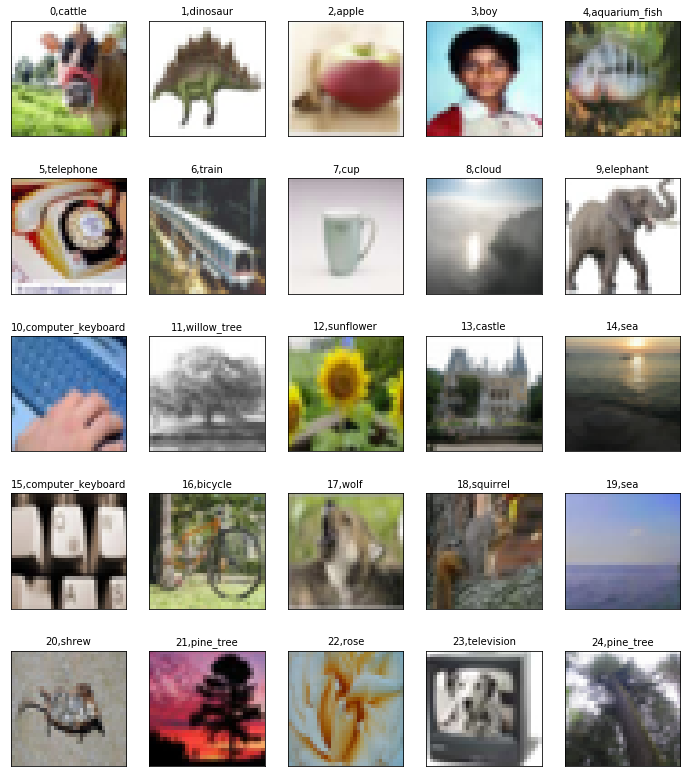

In [10]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [11]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [12]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_label_train.shape

(50000, 1)

In [16]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [17]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [18]:
y_label_train_OneHot.shape

(50000, 100)

In [19]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.